# Download medium range meteogram in png or pdf format
In this exmaple we will download a 15 days megeogram for a specific base date and location.  
For this we will need to use libraries: 
- [requests](https://docs.python-requests.org/en/master/) 
- [json](https://docs.python.org/3/library/json.html)
- [datetime](https://docs.python.org/3/library/datetime.html) and
- [IPython](https://ipython.readthedocs.io)

In [1]:
import requests
import json
import datetime
from IPython import display

## Build link to download
First thing is to build the link to download from. The base of the link is the same for all the products:

In [2]:
api_url = "https://charts.ecmwf.int/opencharts-api/v1/"

The minimum parameter we need to pass is the product. To find the name of the product we want to download, click on Download link on the [Meteogram page](https://charts.ecmwf.int/products/opencharts_meteogram) and then 'More documentation can be [found here](https://charts.ecmwf.int/opencharts-api/v1/swagger-ui/?product=opencharts_meteogram&package=opencharts)' will pop up.  
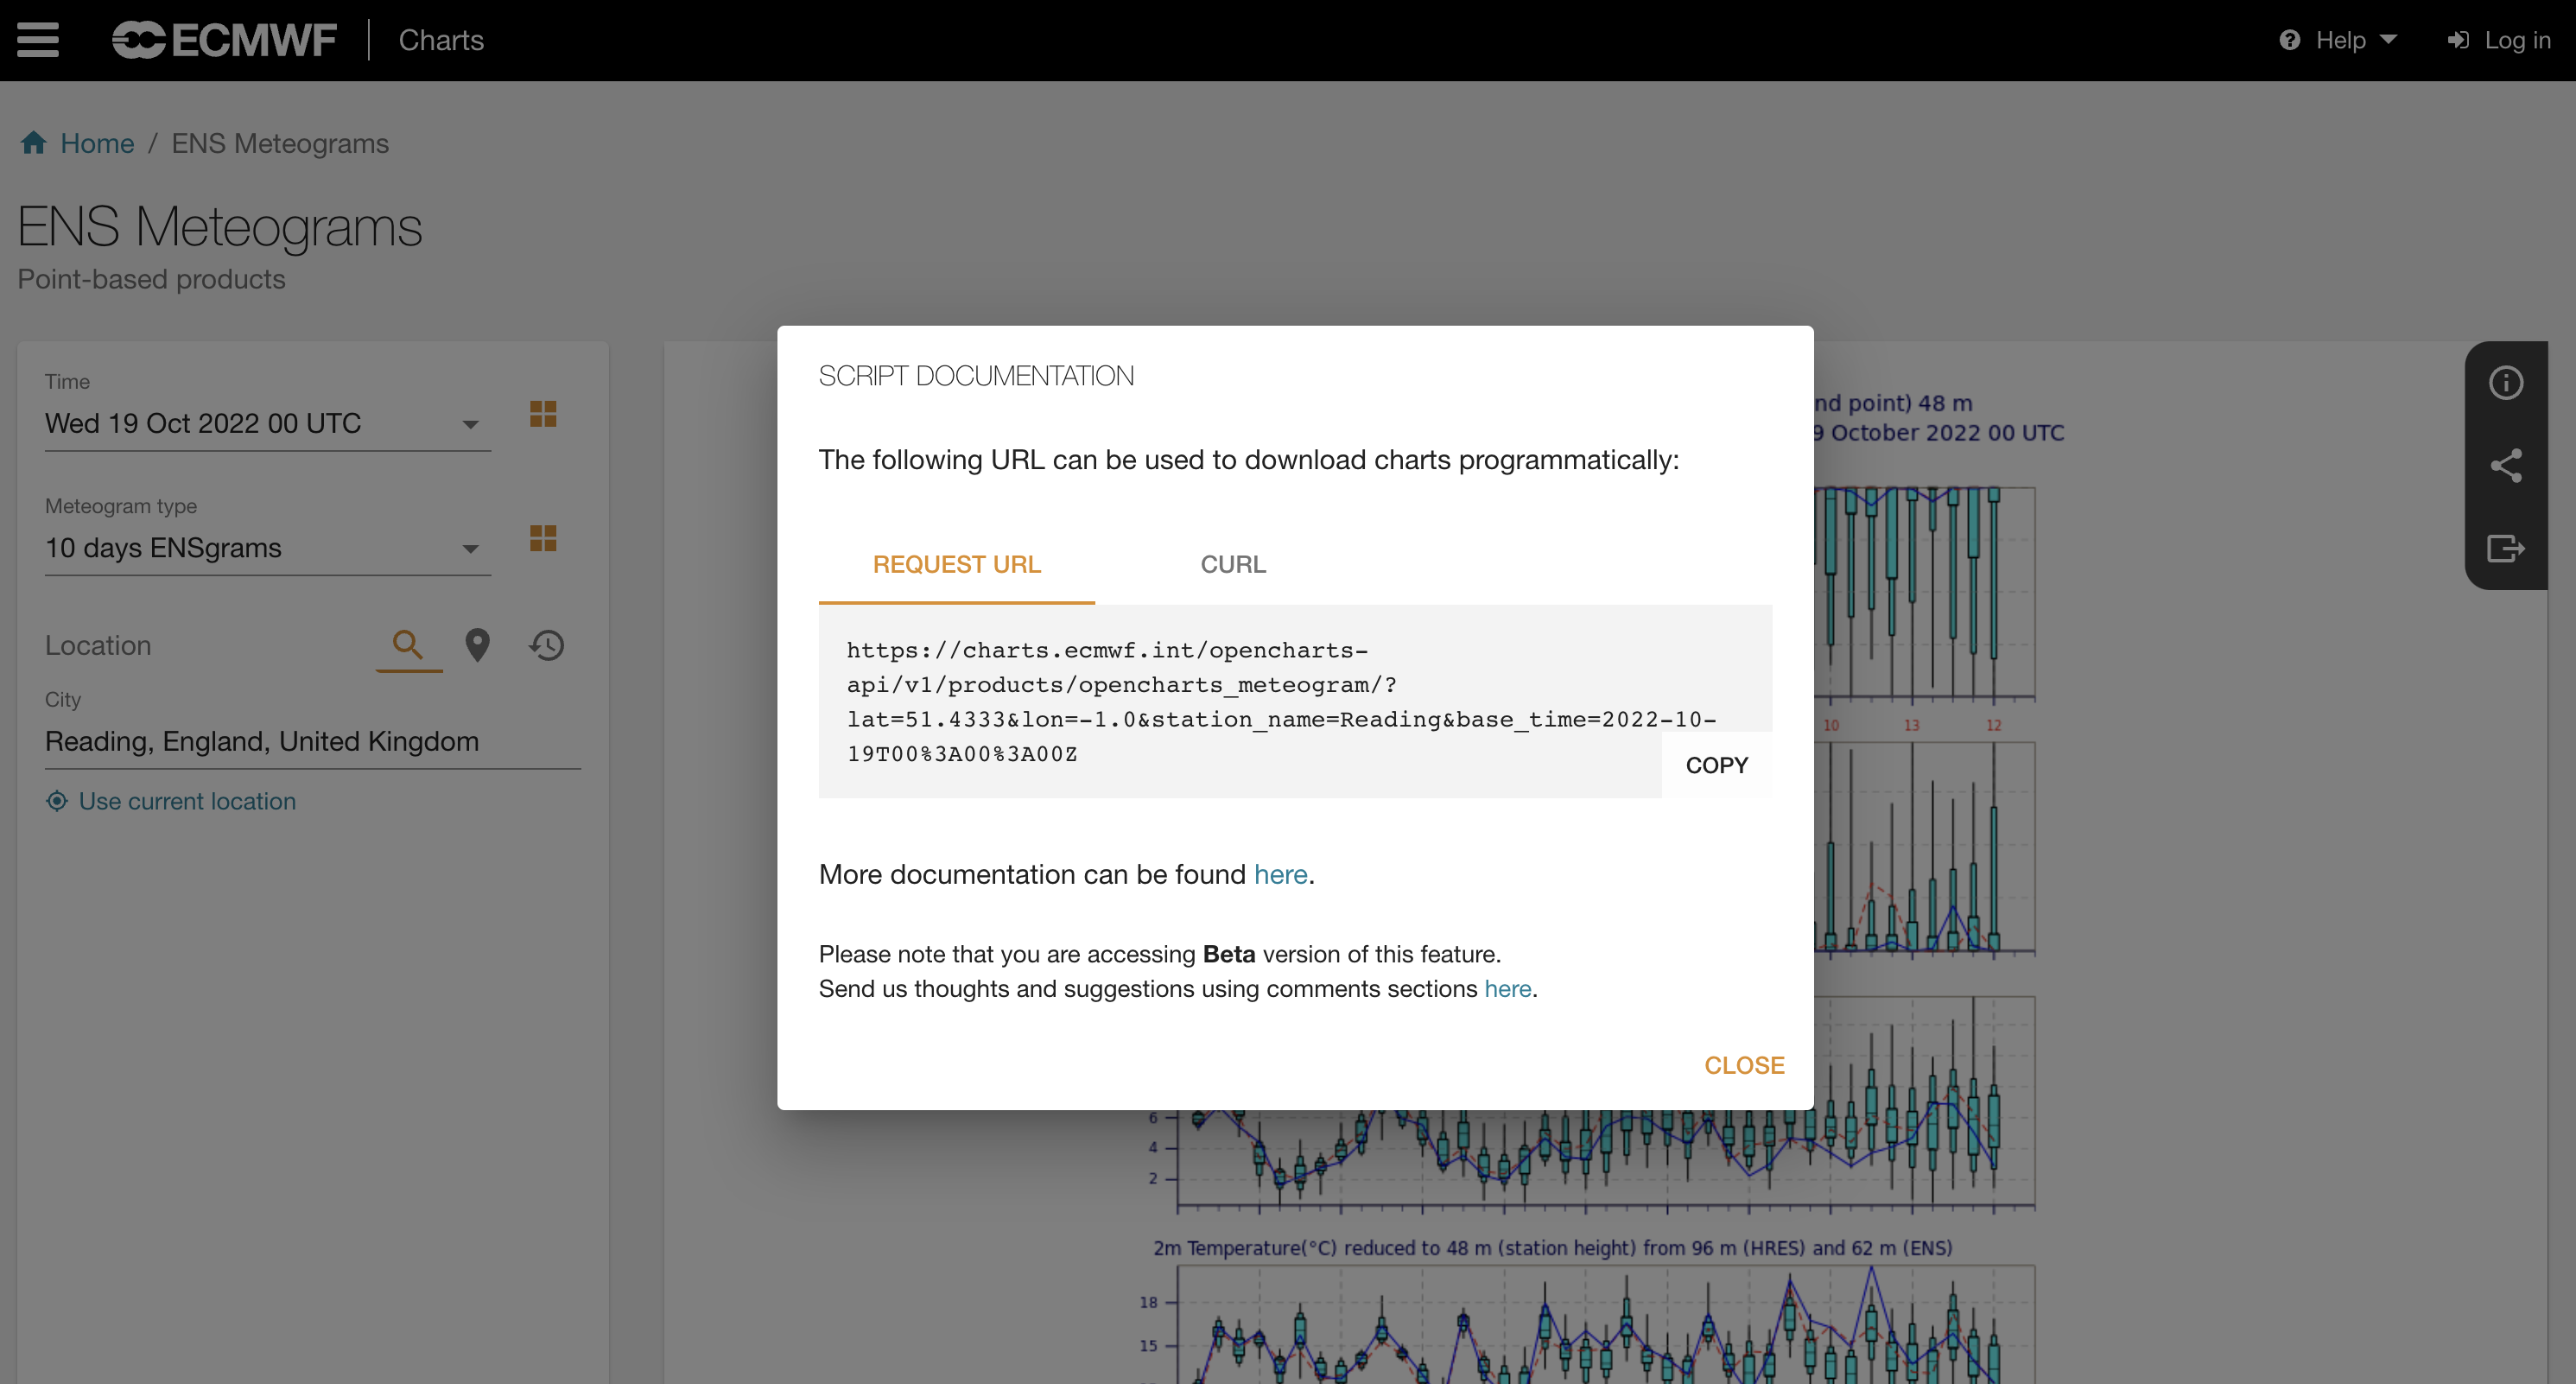

Click on the link to open the Swagger UI documentation. For this meteogram, [this page](https://charts.ecmwf.int/opencharts-api/v1/swagger-ui/?product=opencharts_meteogram&package=opencharts) will open.  

It will contain the name of the product and all its parameters.  

When you click on GET button, it will look something like this:  
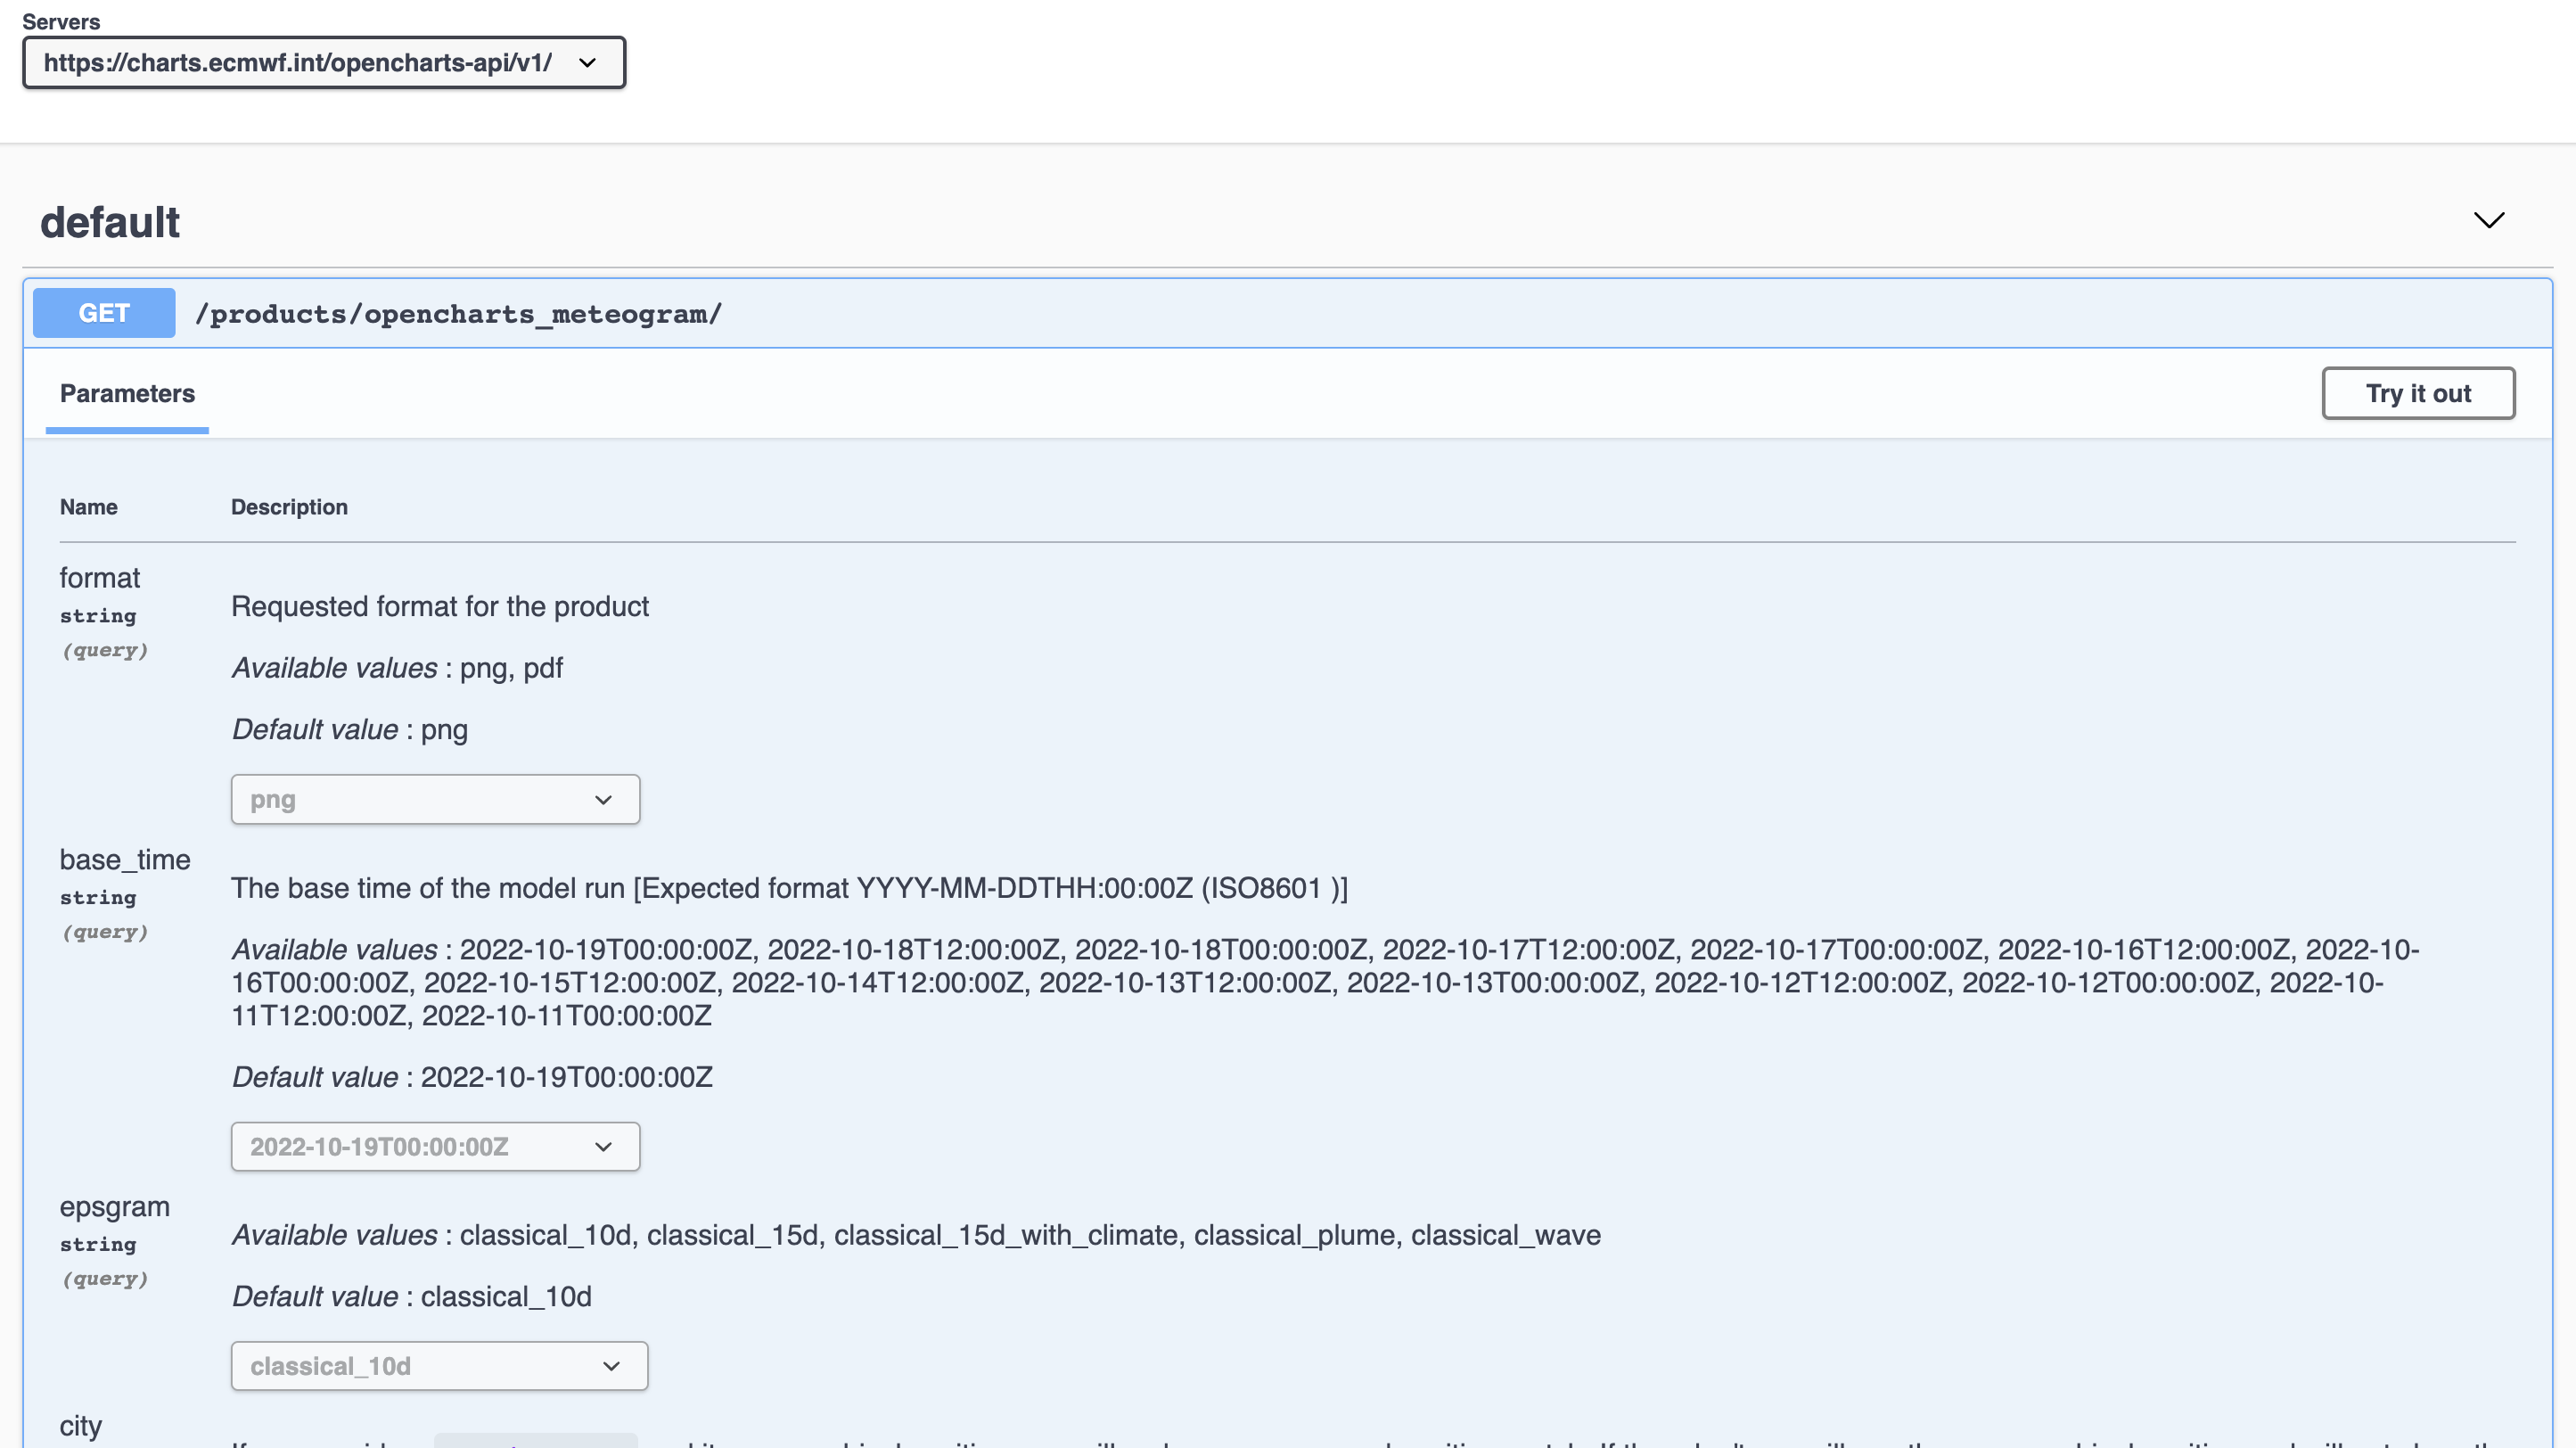

In [3]:
product = 'opencharts_meteogram'

If we just put that, we will get the latest available meteogram for Reading, UK. Very exciting, but not so if you are not in Reading.  
In the documentation we can see that this product has following parameters: **format**, **base_date**, **epsgram** (type of the meteogram), **city**, **lat** and **lon**. 

If we provide just the city (station_name), we will get back the meteogram for this location if it was found in the database. If there are more cities with the same name we need to provide latitude and longitude as well, to make sure we got the right location (very important if you need forecast for Reading, Pennsylvania or Paris, Texas in USA, for example).  
We can use the web interface to find the exact locations to use.  
Let's set them.

In [4]:
epsgram='classical_15d_with_climate'
lat='50.7333'
lon='7.1'
station_name='Bonn'

today = datetime.date.today()
base_time = today.strftime('%Y-%m-%dT%H:%M:%SZ')


Next we create the full link

In [5]:
get = '{}products/{}/?epsgram={}&base_time={}&station_name={}&lat={}&lon={}'.format(api_url,
                                                                                    product,
                                                                                    epsgram,
                                                                                    base_time,
                                                                                    station_name,
                                                                                    lat,
                                                                                    lon)
get

'https://charts.ecmwf.int/opencharts-api/v1/products/opencharts_meteogram/?epsgram=classical_15d_with_climate&base_time=2022-10-19T00:00:00Z&station_name=Bonn&lat=50.7333&lon=7.1'

And download the content and convert to dictionary

In [6]:
result = requests.get(get)
data = result.json()
print ( json.dumps(data, indent=2 ))

{
  "meta": {
    "terms-and-conditions": {
      "href": "https://apps.ecmwf.int/datasets/licences/general/"
    },
    "license": "CC-BY-4.0",
    "copyright": "2021 European Centre for Medium-Range Weather Forecasts"
  },
  "data": {
    "link": {
      "href": "https://charts.ecmwf.int/content/20221019085324-5d56de78c88d1832b59c514c408c6da3bde6e32f.png",
      "type": "image/png"
    },
    "attributes": {
      "description": "",
      "name": "opencharts_meteogram",
      "title": "ENS Meteograms"
    },
    "type": "graphical_product"
  },
  "tracker": "tracker-1f89699c001d428ebf545d0e7f1b9196",
  "uid": ""
}


From this, we can see that actual link to the image is contained under keys **"data"**, **"link"** and **"href"**.

In [7]:
image_api = data["data"]["link"]["href"]
image_api

'https://charts.ecmwf.int/content/20221019085324-5d56de78c88d1832b59c514c408c6da3bde6e32f.png'

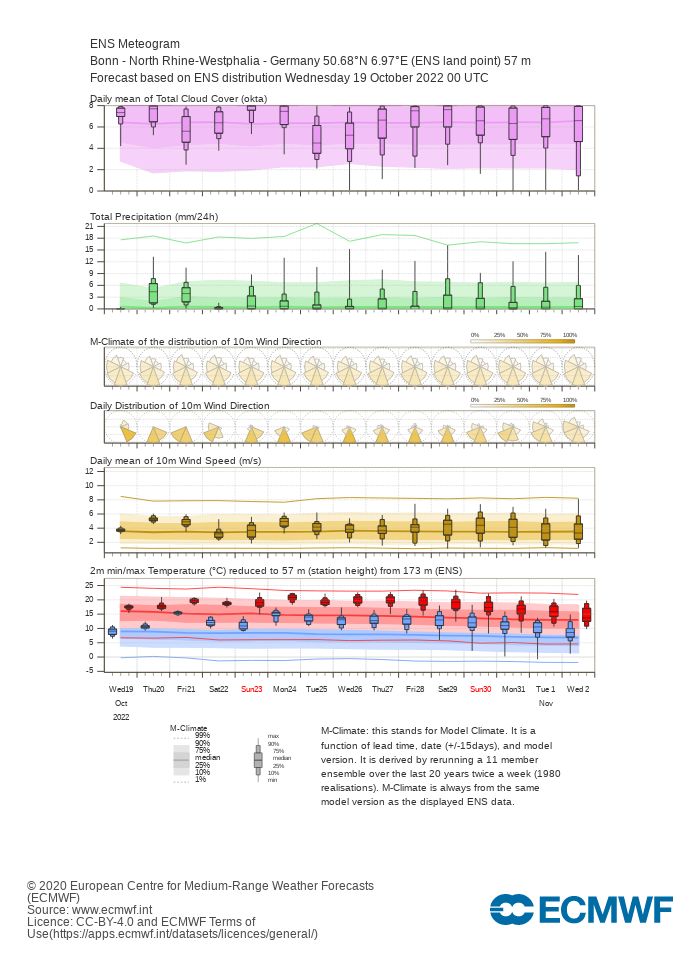

In [8]:
display.Image(image_api)

## Saving the image
The following code will save the image in the same directory where this notebook was ran from.  
If you want to save it in some other directory, replace the dot with the */path/to/directory* for the absolute path or *path/to/directory* for the relative path.

In [9]:
image = requests.get(image_api)
file = "./{}.png".format(product)
with open(file, "wb") as img:
    img.write(image.content)

    
print ( "image saved in {}".format(file) )

image saved in ./opencharts_meteogram.png


## Saving in pdf format
PNG format is default, which is why we didn't have it in our first version of the link.  
To get the pdf format, all we need to do is to add format parameter and set it to pdf.

In [10]:
image_format = 'pdf'
get = '{}products/{}/?epsgram={}&base_time={}&station_name={}&lat={}&lon={}&format={}'.format(api_url, 
                                                                                    product, 
                                                                                    epsgram, 
                                                                                    base_time, 
                                                                                    station_name, 
                                                                                    lat, 
                                                                                    lon,
                                                                                    image_format)

result = requests.get(get)
data = result.json()
image_api = data["data"]["link"]["href"]
image = requests.get(image_api)
file = "./{}.pdf".format(product)
with open(file, "wb") as img:
    img.write(image.content)

    
print ( "image saved in {}".format(file) )

image saved in ./opencharts_meteogram.pdf
